In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.text import Text
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from preprocess_data import oversampled_X, oversampled_y 

1. Average coeff between sleep and stress =  0.052
uncorrelated

2. Average coeff between sleepProblem and stress =  0.034
uncorrelated

3. Average coeff between amCondition and stress =  0.197
correlated

4. Average coeff between amEmotion and stress =  0.194
correlated

5. Average coeff between pmEmotion and stress =  0.337
correlated

6. Average coeff between pmFatigue and stress =  0.311
correlated

7. Average coeff between sleep_score and stress =  0.004
uncorrelated

['amCondition', 'amEmotion', 'pmEmotion', 'pmFatigue']
[0.1968, 0.1938, 0.3369, 0.3105]


In [3]:
# Evaluate model

def calculate_accuracy(model, x_test,y_test):
    target_names = ['1 (Very much)','2 (Neutral)', '3 (Not at all)']
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    print('Accuracy: %.4f' %(accuracy))
    print('Precision: %.4f' %(precision))
    print('Recall: %.4f' %(recall))
    print('F1 score: %.4f' %(f1))

In [4]:
# Make training data and test data
le = LabelEncoder()
xtrain, xtest, ytrain, ytest = train_test_split(oversampled_X, oversampled_y, test_size=0.2, stratify=oversampled_y, random_state=42)
ytrain = le.fit_transform(ytrain)
ytest = le.fit_transform(ytest)

In [5]:
# 1. Train using Logistic Regression Model
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(xtrain, ytrain)

ypredict_logreg = logreg.predict(xtest)

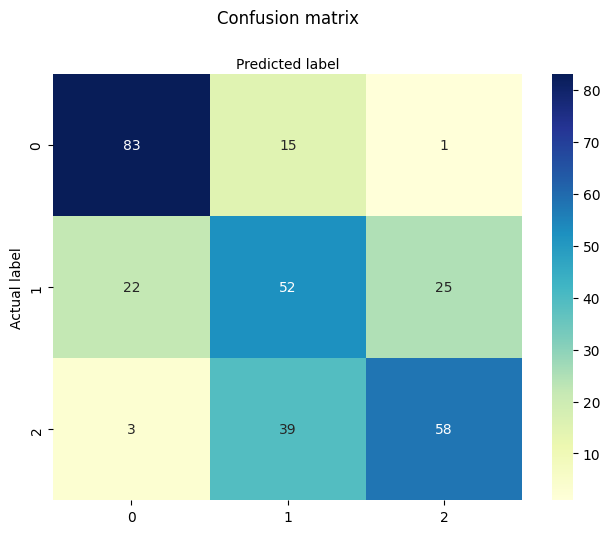

In [6]:
# Evaluate
cnf_matrix1 = confusion_matrix(ytest, ypredict_logreg)

class_names=["Stressed","Neutral","Not Stressed"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [7]:
print("Logistic regression model evaluation")
calculate_accuracy(logreg,xtest,ytest)

Logistic regression model evaluation
Accuracy: 0.6477
Precision: 0.6500
Recall: 0.6477
F1 score: 0.6465


In [8]:
# 2. SVM model
# Find optimal value of C and gamma
svm_param={'C':[1,5,10,20,40,100],
      'gamma':[.1, .25, .5, 1]}

# linear
GS_linear=GridSearchCV(SVC(kernel='linear'),svm_param, cv=5)
GS_linear.fit(xtrain, ytrain)
print("Best Score: ", GS_linear.best_score_)
print("Best Parameters: ", GS_linear.best_params_)

model_linear = GS_linear.best_estimator_
ypredict_linear = model_linear.predict(xtest)

Best Score:  0.6831932773109244
Best Parameters:  {'C': 5, 'gamma': 0.1}


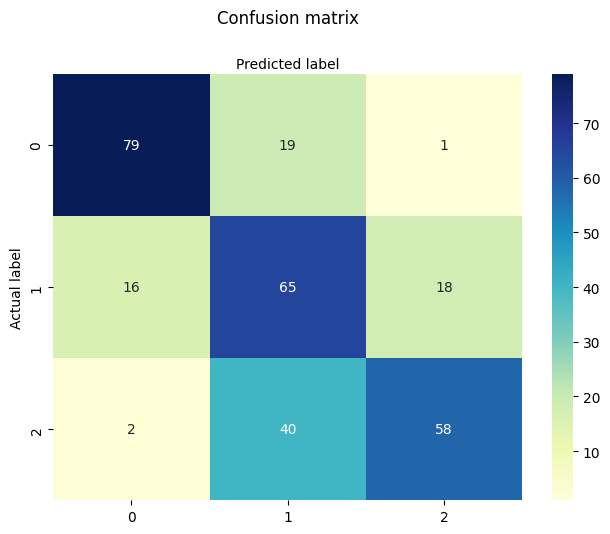

In [9]:
cnf_matrix2 = confusion_matrix(ytest, ypredict_linear)

class_names=["Stressed","Neutral","Not Stressed"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [10]:
print("Linear SVM model evaluation")
calculate_accuracy(model_linear,xtest,ytest)

Linear SVM model evaluation
Accuracy: 0.6779
Precision: 0.6975
Recall: 0.6779
F1 score: 0.6814


In [11]:
# rbf - nonlinear
GS_rbf=GridSearchCV(SVC(kernel='rbf'),svm_param, cv=5)
GS_rbf.fit(xtrain, ytrain)
print("Best Score: ", GS_rbf.best_score_)
print("Best Parameters: ", GS_rbf.best_params_)

model_rbf = GS_rbf.best_estimator_
ypredict_rbf = model_rbf.predict(xtest)

Best Score:  0.7352941176470588
Best Parameters:  {'C': 100, 'gamma': 1}


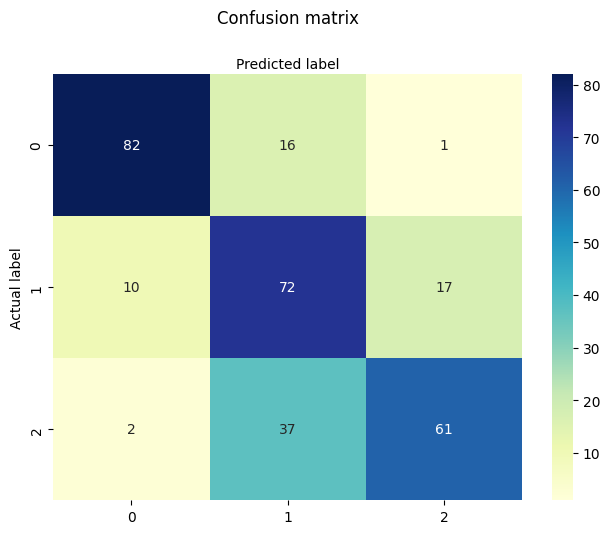

In [12]:
cnf_matrix3 = confusion_matrix(ytest, ypredict_rbf)

class_names=["Stressed","Neutral","Not Stressed"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [13]:
print("RBF SVM model evaluation")
calculate_accuracy(model_rbf,xtest,ytest)

RBF SVM model evaluation
Accuracy: 0.7215
Precision: 0.7403
Recall: 0.7215
F1 score: 0.7246


In [14]:
# poly - nonlinear
GS_poly=GridSearchCV(SVC(kernel='poly'),svm_param, cv=5)
GS_poly.fit(xtrain, ytrain)
print("Best Score: ", GS_poly.best_score_)
print("Best Parameters: ", GS_poly.best_params_)

model_poly = GS_poly.best_estimator_
ypredict_poly = model_poly.predict(xtest)

Best Score:  0.7008403361344538
Best Parameters:  {'C': 100, 'gamma': 1}


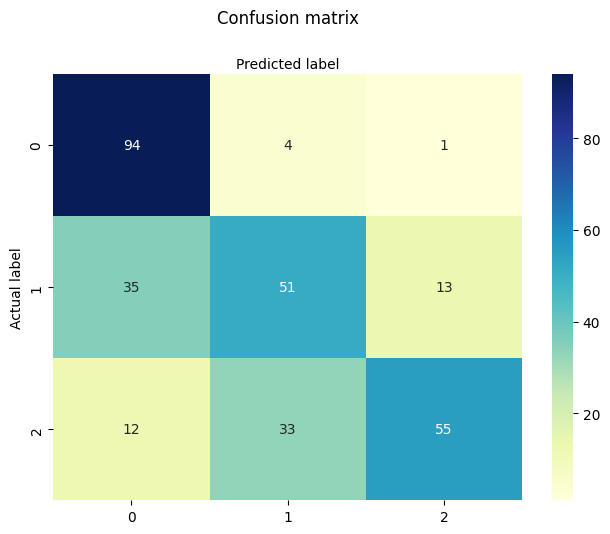

In [15]:
cnf_matrix4 = confusion_matrix(ytest, ypredict_poly)

class_names=["Stressed","Neutral","Not Stressed"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [16]:
print("Poly SVM model evaluation")
calculate_accuracy(model_poly,xtest,ytest)

Poly SVM model evaluation
Accuracy: 0.6711
Precision: 0.6815
Recall: 0.6711
F1 score: 0.6599


In [17]:
# 3. Decision Tree Classifier

dt_param={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

dt = DecisionTreeClassifier()
GS_dt = GridSearchCV(dt, param_grid=dt_param, cv=5, refit=True)

GS_dt.fit(xtrain, ytrain)

dt = GS_dt.best_estimator_
print("Best Score: ",GS_dt.best_score_)
print("Best Parameters: ", GS_dt.best_params_)

ypredict_dt = dt.predict(xtest)


Best Score:  0.7655462184873949
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


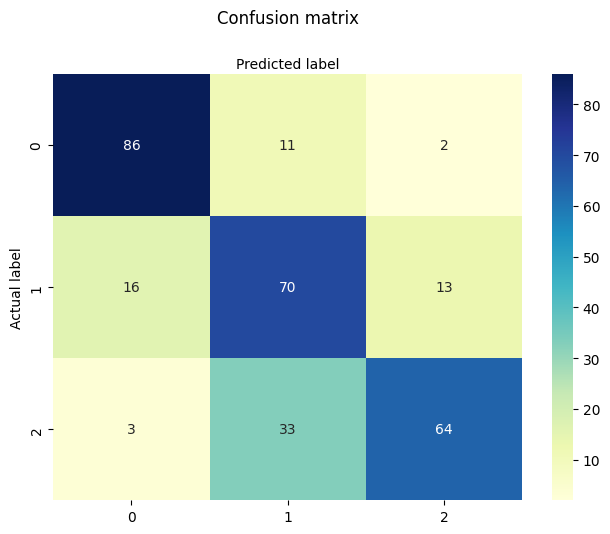

In [18]:
cnf_matrix5 = confusion_matrix(ytest, ypredict_dt)

class_names=["Stressed","Neutral","Not Stressed"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [19]:
print("Decision Tree Classifier evaluation")
calculate_accuracy(dt,xtest,ytest)

Decision Tree Classifier evaluation
Accuracy: 0.7383
Precision: 0.7479
Recall: 0.7383
F1 score: 0.7384


In [20]:
# 4. XGBoost
model_xgboost = XGBClassifier(
    booster = 'gbtree',
    objective = 'multi:softmax',
    eval_metric='merror'
)

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [2,3,5,7],
}

xgb_grid=GridSearchCV(model_xgboost, param_grid = xgb_param_grid,  cv=5, refit=True)
xgb_grid.fit(xtrain, ytrain)
print("Best Score: ",xgb_grid.best_score_)
print("Best Parameters: ", xgb_grid.best_params_)

model_xgboost = xgb_grid.best_estimator_  
model_xgboost.fit(xtrain,ytrain)

ypredict_xgb = model_xgboost.predict(xtest)


Best Score:  0.7722689075630251
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


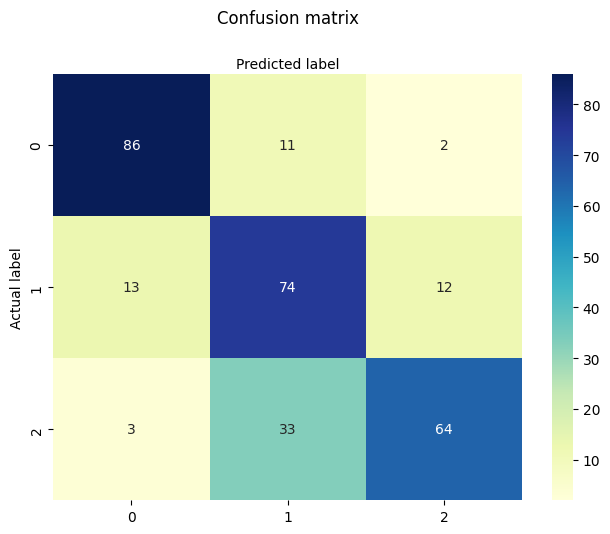

In [21]:
cnf_matrix6 = confusion_matrix(ytest, ypredict_xgb)

class_names=["Stressed","Neutral","Not Stressed"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [22]:
print("XGBoost model evaluation")
calculate_accuracy(model_xgboost,xtest,ytest)

XGBoost model evaluation
Accuracy: 0.7517
Precision: 0.7638
Recall: 0.7517
F1 score: 0.7522
